Initialisation

In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

N = 10 #Number of points

Dataset generation

In [2]:
def pointgeneration():
    """
    Return a list of two numbers in [0,1]
    """
    return rd.rand(2)

In [3]:
def generateB(n):
    """
    Return list of n list of 2 elements
    """
    return rd.uniform(size=(n, 2))
    
print(generateB(N))

[[0.13791911 0.28262765]
 [0.64453315 0.42437145]
 [0.64498635 0.19103537]
 [0.13064263 0.08828359]
 [0.19031515 0.66404789]
 [0.90810119 0.87934981]
 [0.7486916  0.63543625]
 [0.0203823  0.57599988]
 [0.59905336 0.13502424]
 [0.65414315 0.72197237]]


In [4]:
def generateA(n):

    A=generateB(n-4)

    #adding the corner
    A= np.append(A,[[0,0]],axis=0)
    A= np.append(A,[[0,1]],axis=0)
    A= np.append(A,[[1,0]],axis=0)
    A= np.append(A,[[1,1]],axis=0)

    #rotating the set
    angle = rd.uniform() * 2 * np.pi
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    A = A @ rotation_matrix

    # Shuffle the points
    np.random.shuffle(A)
    return A


In [64]:
def generateC(n,r):
    C=np.empty((1,2))
    while np.size(C,0)<n:
        x,y=rd.uniform(-r,r),rd.uniform(-r,r)
        if x**2+y**2<=r**2:
            C = np.append(C,[[x,y]], axis=0)
    return C


In [6]:
def generateD(n,r):
    D=np.empty((1,2))
    for i in range(n):
        angle = rd.uniform()*2*np.pi
        D = np.append(D,[[r*np.cos(angle),r*np.sin(angle)]],axis=0)
    return D


Sweeping

In [43]:
def clockwise(a,b,c):
    #Takes 3 points a,b,c of type np.array and return if the triangle ABC is clock-wised 
    
    if np.linalg.det(np.concatenate(((c-b).reshape(2,1),(b-a).reshape(2,1)),axis=1))>0: return True
    else: return False

In [133]:
def sweeping_algo(l):
    #l is a list of points of type np.array, assuming there are >= 2 points and sorted by increasing x
    order=l[:, 0].argsort()
    l=l[order]
    N=l.shape[0]

    hull=[]

    hull.append(l[0])
    hull.append(l[1])

    for x in l[2:,:]: 
        if clockwise(hull[-2],hull[-1],x): hull.append(x)
        else : 
            while len(hull)>=2 and not clockwise(hull[-2],hull[-1],x): 
                hull.pop()
            hull.append(x)

    for i in reversed(range(N)):
        if clockwise(hull[-2],hull[-1],l[i]): hull.append(l[i])
        else : 
            while len(hull)>=2 and not clockwise(hull[-2],hull[-1],l[i]): 
                hull.pop()
            hull.append(l[i])

    return np.array(hull)


Test Sweeping

In [142]:
def sweeping_test(N):
    C=generateC(N,1)
    D=generateD(N,1)

    C_hull=sweeping_algo(C)

    plt.scatter(D[:,0],D[:,1],c='b')
    plt.scatter(C[:,0],C[:,1],c='r')
    plt.scatter(C_hull[:,0],C_hull[:,1],marker='x')

    plt.show()


/var/folders/s2/2nqmwzkj3dl5tx7slppch48c0000gn/T/ipykernel_25345/2507102681.py:4: RuntimeWarning: invalid value encountered in subtract
  if np.linalg.det(np.concatenate(((c-b).reshape(2,1),(b-a).reshape(2,1)),axis=1))>0: return True


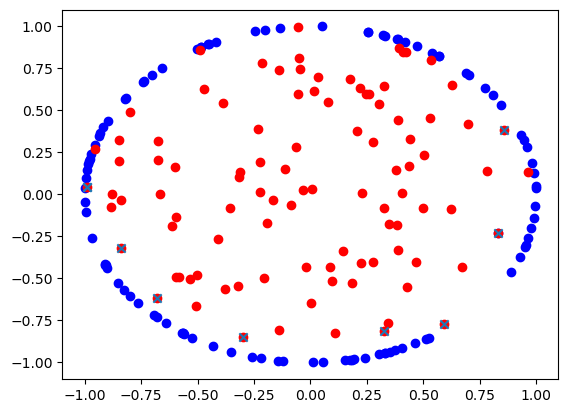

In [148]:
sweeping_test(100)